## Load Library

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import pylab
import seaborn as sns
from matplotlib import pyplot as plt
from skimpy import skim
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import random

## Load The Data From CSV File

### Read file from working directory

In [2]:
flight2004 = pd.read_csv("/Users/MIchelle/Desktop/ST2195 Coursework/2004.csv")
flight2005 = pd.read_csv("/Users/MIchelle/Desktop/ST2195 Coursework/2005.csv")
airports = pd.read_csv("/Users/MIchelle/Desktop/ST2195 Coursework/airports.csv")
carriers = pd.read_csv("/Users/MIchelle/Desktop/ST2195 Coursework/carriers.csv")
planes = pd.read_csv("/Users/MIchelle/Desktop/ST2195 Coursework/plane-data.csv")

## Combine flight2004 and flight2005 into flights and clean the dataset

In [3]:
flights = pd.concat([flight2004, flight2005])

#Clean data which the flights are not cancelled and diverted
flights = flights[(flights["Cancelled"] == 0) & (flights["Diverted"] == 0)]
flights = flights.drop_duplicates()
flights

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2004,1,12,1,623.0,630,901.0,915,UA,462,...,7,11,0,NaN,0,0,0,0,0,0
1,2004,1,13,2,621.0,630,911.0,915,UA,462,...,16,16,0,NaN,0,0,0,0,0,0
2,2004,1,14,3,633.0,630,920.0,915,UA,462,...,4,15,0,NaN,0,0,0,0,0,0
3,2004,1,15,4,627.0,630,859.0,915,UA,462,...,4,10,0,NaN,0,0,0,0,0,0
4,2004,1,16,5,635.0,630,918.0,915,UA,462,...,3,13,0,NaN,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7140591,2005,12,22,4,1652.0,1655,1815.0,1837,DL,901,...,7,15,0,NaN,0,0,0,0,0,0
7140592,2005,12,22,4,1825.0,1825,1858.0,1848,DL,902,...,7,32,0,NaN,0,0,0,0,0,0
7140593,2005,12,22,4,1507.0,1511,1641.0,1649,DL,903,...,4,29,0,NaN,0,0,0,0,0,0
7140594,2005,12,22,4,924.0,925,1056.0,1111,DL,904,...,4,19,0,NaN,0,0,0,0,0,0


## Question 1 : When is the best time of day, day of the week, and time of year to fly to minimize delays?

### Best Time of Day

### Group CRSDepTime in 2 Hours Interval

In [4]:
conditions = [
    (flights['CRSDepTime'] >= 000) & (flights['CRSDepTime'] < 200),
    (flights['CRSDepTime'] >= 200) & (flights['CRSDepTime'] < 400),
    (flights['CRSDepTime'] >= 400) & (flights['CRSDepTime'] < 600),
    (flights['CRSDepTime'] >= 600) & (flights['CRSDepTime'] < 800),
    (flights['CRSDepTime'] >= 800) & (flights['CRSDepTime'] < 1000),
    (flights['CRSDepTime'] >= 1000) & (flights['CRSDepTime'] < 1200),
    (flights['CRSDepTime'] >= 1200) & (flights['CRSDepTime'] < 1400),
    (flights['CRSDepTime'] >= 1400) & (flights['CRSDepTime'] < 1600),
    (flights['CRSDepTime'] >= 1600) & (flights['CRSDepTime'] < 1800),
    (flights['CRSDepTime'] >= 1800) & (flights['CRSDepTime'] < 2000),
    (flights['CRSDepTime'] >= 2000) & (flights['CRSDepTime'] < 2200),
    (flights['CRSDepTime'] >= 2200) & (flights['CRSDepTime'] < 2400),
    ]
values = ['00.00-01.59', '02.00-03.59', '04.00-05.59', '06.00-07.59', '08.00-09.59', '10.00-11.59', 
          '12.00-13.59', '14.00-15.59', '16.00-17.59', '18.00-19.59', '20.00-21.59', '22.00-23.59']

flights['interval_deptime'] = np.select(conditions, values)
flights

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,interval_deptime
0,2004,1,12,1,623.0,630,901.0,915,UA,462,...,11,0,NaN,0,0,0,0,0,0,06.00-07.59
1,2004,1,13,2,621.0,630,911.0,915,UA,462,...,16,0,NaN,0,0,0,0,0,0,06.00-07.59
2,2004,1,14,3,633.0,630,920.0,915,UA,462,...,15,0,NaN,0,0,0,0,0,0,06.00-07.59
3,2004,1,15,4,627.0,630,859.0,915,UA,462,...,10,0,NaN,0,0,0,0,0,0,06.00-07.59
4,2004,1,16,5,635.0,630,918.0,915,UA,462,...,13,0,NaN,0,0,0,0,0,0,06.00-07.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7140591,2005,12,22,4,1652.0,1655,1815.0,1837,DL,901,...,15,0,NaN,0,0,0,0,0,0,16.00-17.59
7140592,2005,12,22,4,1825.0,1825,1858.0,1848,DL,902,...,32,0,NaN,0,0,0,0,0,0,18.00-19.59
7140593,2005,12,22,4,1507.0,1511,1641.0,1649,DL,903,...,29,0,NaN,0,0,0,0,0,0,14.00-15.59
7140594,2005,12,22,4,924.0,925,1056.0,1111,DL,904,...,19,0,NaN,0,0,0,0,0,0,08.00-09.59


In [5]:
best_time_of_day_filtered = flights[flights.ArrDelay > 0]
best_time_of_day_grouped = best_time_of_day_filtered.groupby('interval_deptime').agg({"ArrDelay" : "mean"}).reset_index()
best_time_of_day = best_time_of_day_grouped.rename(columns = {"ArrDelay" : "avg_delay"})
best_time_of_day

,interval_deptime,avg_delay
0,00.00-01.59,21.980244
1,02.00-03.59,23.549769
2,04.00-05.59,21.184256
3,06.00-07.59,19.253798
4,08.00-09.59,21.064990
5,10.00-11.59,22.455072
6,12.00-13.59,25.654334
7,14.00-15.59,29.536884
8,16.00-17.59,33.638815
9,18.00-19.59,35.714495


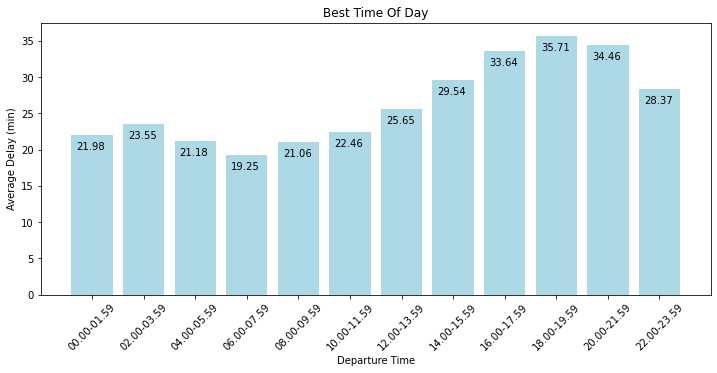

In [6]:
fig, ax = plt.subplots(figsize = (12,5))
plt.bar(best_time_of_day["interval_deptime"],best_time_of_day['avg_delay'], color = "lightblue", width = 0.8)
plt.title('Best Time Of Day')
plt.xlabel("Departure Time")
plt.ylabel('Average Delay (min)')
plt.xticks(rotation=45)

for i, number in enumerate(best_time_of_day['avg_delay']):
    plt.text(x=i-0.3, y=number-2, s=round(number, 2))
plt.show()

### Best Day of Week

In [7]:
best_day_of_week_filtered = flights[flights.ArrDelay > 0]
best_day_of_week_grouped = best_day_of_week_filtered.groupby('DayOfWeek').agg({"ArrDelay" : "mean"}).reset_index()
best_day_of_week = best_day_of_week_grouped.rename(columns = {"ArrDelay" : "avg_delay"})
best_day_of_week

,DayOfWeek,avg_delay
0,1,29.306150
1,2,26.620974
2,3,28.737427
3,4,29.036092
4,5,28.257788
5,6,24.849796
6,7,28.006315


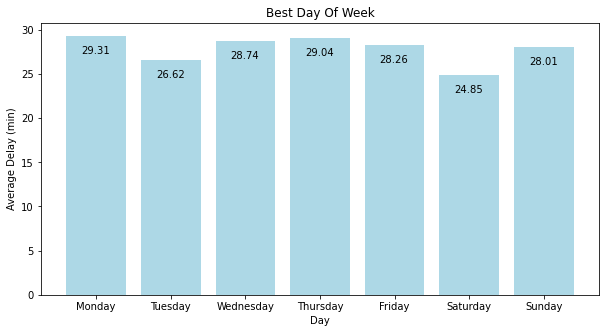

In [8]:
fig, ax = plt.subplots(figsize = (10,5))
plt.bar(best_day_of_week["DayOfWeek"],best_day_of_week['avg_delay'], color = "lightblue", width = 0.8)
plt.title('Best Day Of Week')
plt.xlabel("Day")
plt.ylabel('Average Delay (min)')
positions = (1, 2, 3, 4, 5, 6, 7)
labels = ("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
plt.xticks(positions, labels)

for i, number in enumerate(best_day_of_week['avg_delay']):
    plt.text(x=i+0.8, y=number-2, s=round(number, 2))
plt.show()

### Best Time of Year

In [9]:
best_time_of_year_filtered = flights[flights.ArrDelay > 0]
best_time_of_year_grouped = best_time_of_year_filtered.groupby('Month').agg({"ArrDelay" : "mean"}).reset_index()
best_time_of_year = best_time_of_year_grouped.rename(columns = {"ArrDelay" : "avg_delay"})
best_time_of_year

,Month,avg_delay
0,1,29.763226
1,2,26.270685
2,3,26.573333
3,4,22.714379
4,5,27.716673
5,6,31.670805
6,7,33.812962
7,8,29.622523
8,9,23.157299
9,10,23.663587


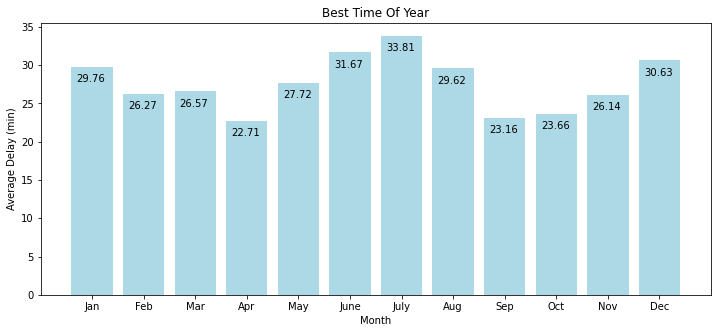

In [10]:
fig, ax = plt.subplots(figsize = (12,5))
plt.bar(best_time_of_year["Month"],best_time_of_year['avg_delay'], color = "lightblue", width = 0.8)
plt.title('Best Time Of Year')
plt.xlabel("Month")
plt.ylabel('Average Delay (min)')
positions = (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
labels = ("Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec")
plt.xticks(positions, labels)

for i, number in enumerate(best_time_of_year['avg_delay']):
    plt.text(x=i+0.7, y=number-2, s=round(number, 2))
plt.show()

## Question 2 : Do older planes suffer more delays?

In [11]:
planes_age_inner_join = pd.merge(flights,planes,left_on = "TailNum", right_on = "tailnum")
planes_age_inner_join

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,interval_deptime,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,2004,1,12,1,623.0,630,901.0,915,UA,462,...,06.00-07.59,N805UA,Corporation,AIRBUS INDUSTRIE,05/28/1998,A319-131,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998
1,2004,1,10,6,1554.0,1520,1831.0,1744,UA,463,...,14.00-15.59,N805UA,Corporation,AIRBUS INDUSTRIE,05/28/1998,A319-131,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998
2,2004,1,19,1,2042.0,2045,2309.0,2313,UA,466,...,20.00-21.59,N805UA,Corporation,AIRBUS INDUSTRIE,05/28/1998,A319-131,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998
3,2004,1,19,1,1634.0,1640,1953.0,1952,UA,466,...,16.00-17.59,N805UA,Corporation,AIRBUS INDUSTRIE,05/28/1998,A319-131,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998
4,2004,1,6,2,859.0,900,1158.0,1211,UA,526,...,08.00-09.59,N805UA,Corporation,AIRBUS INDUSTRIE,05/28/1998,A319-131,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10195601,2005,12,13,2,1558.0,1605,1709.0,1720,CO,722,...,16.00-17.59,N37298,Corporation,BOEING,11/22/2005,737-824,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2005
10195602,2005,12,13,2,1414.0,1415,1517.0,1525,CO,1023,...,14.00-15.59,N37298,Corporation,BOEING,11/22/2005,737-824,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2005
10195603,2005,12,23,5,704.0,700,1219.0,1205,CO,162,...,06.00-07.59,N37298,Corporation,BOEING,11/22/2005,737-824,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2005
10195604,2005,12,20,2,1658.0,1700,2136.0,2115,CO,234,...,16.00-17.59,N37298,Corporation,BOEING,11/22/2005,737-824,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2005


In [12]:
planes_age_filtered = planes_age_inner_join[planes_age_inner_join.ArrDelay > 0]
planes_age_grouped = planes_age_filtered.groupby(["year"]).agg({"ArrDelay" : ["mean", "count"]}).reset_index()
planes_age_grouped.columns = ["year", "avg_delay", "total_flights"]
planes_age = planes_age_grouped[(planes_age_grouped["year"] != "None") 
                                           & (planes_age_grouped["year"] != "0000") 
                                           & (planes_age_grouped["year"] <= "2005")]
planes_age

,year,avg_delay,total_flights
1,1956,29.337607,234
2,1957,20.392562,968
3,1959,31.777202,1930
4,1962,34.050831,1023
5,1963,32.108571,1400
6,1964,33.588979,1107
7,1965,33.778633,1039
8,1966,27.563073,1744
9,1967,23.910976,19343
10,1968,24.668412,32465


In [13]:
planes_age = planes_age.apply(pd.to_numeric)

In [14]:
planes_age.dtypes

year               int64
avg_delay        float64
total_flights      int64
dtype: object

[Text(0.5, 0, 'Year Manufactured'), Text(0, 0.5, 'Average Delay (min)')]

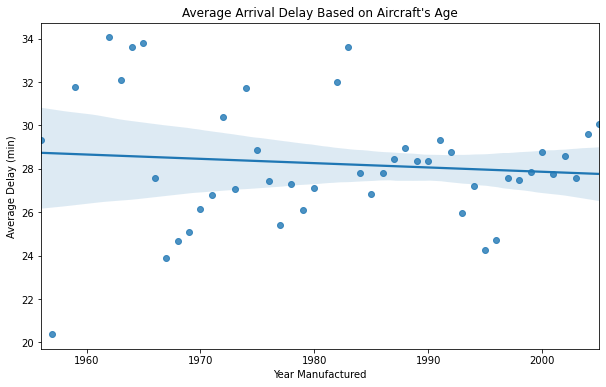

In [15]:
fig, ax = plt.subplots(figsize = (10,6))
sns.regplot(x = "year", y = "avg_delay", data = planes_age).set(title="Average Arrival Delay Based on Aircraft's Age")
ax.set(xlabel="Year Manufactured", ylabel = "Average Delay (min)")

In [16]:
#Calculate Total Flights for Older Planes
older_planes = planes_age[(planes_age["year"] >= 1956) & (planes_age["year"] <= 1980)]
total_older_planes = older_planes["total_flights"].sum()
total_older_planes

149932

In [17]:
#Calculate Total Flights for Younger Planes
younger_planes = planes_age[planes_age.year >= 1981]
total_younger_planes = younger_planes["total_flights"].sum()
total_younger_planes

3957113

### Since the sample size for older planes is relatively low compared to younger planes, the estimation would be less accurate. Hence we plot the younger planes with a larger sample size to provide more accurate results.

In [18]:
younger_planes

,year,avg_delay,total_flights
23,1982,32.013556,2213
24,1983,33.599116,10634
25,1984,27.790122,31485
26,1985,26.856286,107199
27,1986,27.792206,91894
28,1987,28.456811,136783
29,1988,28.981263,164272
30,1989,28.340847,133218
31,1990,28.338743,146412
32,1991,29.315515,149134


In [19]:
younger_planes.dtypes

year               int64
avg_delay        float64
total_flights      int64
dtype: object

[Text(0.5, 0, 'Year Manufactured'), Text(0, 0.5, 'Average Delay (min)')]

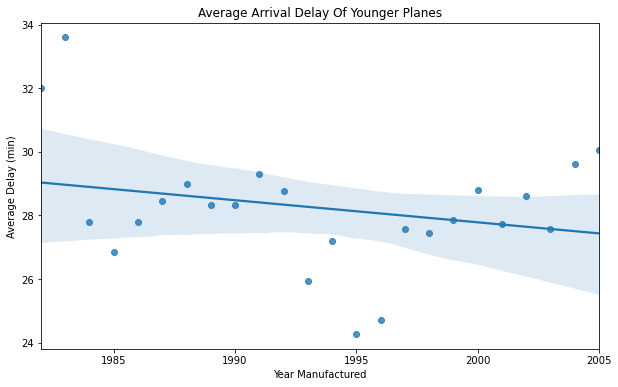

In [20]:
fig, ax = plt.subplots(figsize = (10,6))
sns.regplot(x = "year", y = "avg_delay", data = younger_planes).set(title="Average Arrival Delay Of Younger Planes")
ax.set(xlabel="Year Manufactured", ylabel = "Average Delay (min)")

## Question 3 : How does the number of people flying between different locations change over time?

### Combine Origin and Destination into Route

In [21]:
flights["Route"] = flights["Origin"] + "-" + flights["Dest"]
flights

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,interval_deptime,Route
0,2004,1,12,1,623.0,630,901.0,915,UA,462,...,0,NaN,0,0,0,0,0,0,06.00-07.59,ORD-CLT
1,2004,1,13,2,621.0,630,911.0,915,UA,462,...,0,NaN,0,0,0,0,0,0,06.00-07.59,ORD-CLT
2,2004,1,14,3,633.0,630,920.0,915,UA,462,...,0,NaN,0,0,0,0,0,0,06.00-07.59,ORD-CLT
3,2004,1,15,4,627.0,630,859.0,915,UA,462,...,0,NaN,0,0,0,0,0,0,06.00-07.59,ORD-CLT
4,2004,1,16,5,635.0,630,918.0,915,UA,462,...,0,NaN,0,0,0,0,0,0,06.00-07.59,ORD-CLT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7140591,2005,12,22,4,1652.0,1655,1815.0,1837,DL,901,...,0,NaN,0,0,0,0,0,0,16.00-17.59,ATL-ONT
7140592,2005,12,22,4,1825.0,1825,1858.0,1848,DL,902,...,0,NaN,0,0,0,0,0,0,18.00-19.59,ATL-MEM
7140593,2005,12,22,4,1507.0,1511,1641.0,1649,DL,903,...,0,NaN,0,0,0,0,0,0,14.00-15.59,ATL-SAT
7140594,2005,12,22,4,924.0,925,1056.0,1111,DL,904,...,0,NaN,0,0,0,0,0,0,08.00-09.59,ATL-MSP


### Count Route in 2004

In [22]:
route_2004_filtered = flights[flights["Year"] == 2004]
route_2004 = route_2004_filtered.groupby(["Route"])["Route"].count().reset_index(name = 2004)
route_2004

,Route,2004
0,ABE-ATL,1362
1,ABE-CLE,1031
2,ABE-CLT,324
3,ABE-CVG,1368
4,ABE-DTW,894
...,...,...
4404,XNA-MSP,2
4405,XNA-ORD,1697
4406,YAK-CDV,342
4407,YAK-JNU,343


### Count Route in 2005

In [23]:
route_2005_filtered = flights[flights["Year"] == 2005]
route_2005 = route_2005_filtered.groupby(["Route"])["Route"].count().reset_index(name = 2005)
route_2005

,Route,2005
0,ABE-ATL,1349
1,ABE-AVP,1
2,ABE-CLE,1048
3,ABE-CLT,359
4,ABE-CVG,1191
...,...,...
4482,XNA-SLC,608
4483,YAK-CDV,353
4484,YAK-JNU,352
4485,YUM-LAX,1210


### Inner join route_2004 and route_2005 so we can compare total flights between 2004 and 2005

In [24]:
route_merge = pd.merge(route_2004, route_2005, on = "Route")
route_merge

,Route,2004,2005
0,ABE-ATL,1362,1349
1,ABE-CLE,1031,1048
2,ABE-CLT,324,359
3,ABE-CVG,1368,1191
4,ABE-DTW,894,307
...,...,...,...
4105,XNA-MEM,497,406
4106,XNA-ORD,1697,2744
4107,YAK-CDV,342,353
4108,YAK-JNU,343,352


### Difference of Total Flight between 2004 and 2005 (2005-2005)

In [25]:
route_merge["Difference"] = route_merge[2005] - route_merge[2004]
route_merge

,Route,2004,2005,Difference
0,ABE-ATL,1362,1349,-13
1,ABE-CLE,1031,1048,17
2,ABE-CLT,324,359,35
3,ABE-CVG,1368,1191,-177
4,ABE-DTW,894,307,-587
...,...,...,...,...
4105,XNA-MEM,497,406,-91
4106,XNA-ORD,1697,2744,1047
4107,YAK-CDV,342,353,11
4108,YAK-JNU,343,352,9


### Top 5 of Route's Total Flights' Difference

In [26]:
top_route_merge_sorted = route_merge.sort_values(["Difference"], ascending = False)
top_route_merge = top_route_merge_sorted.head(5)
top_route_merge

,Route,2004,2005,Difference
1148,DFW-GRK,1342,3949,2607
1566,GRK-DFW,1348,3941,2593
725,CLT-LGA,3183,5486,2303
2244,LGA-CLT,3135,5192,2057
3288,PIT-PHL,2532,4533,2001


### To make the visualization easier, we melt the data frame

In [27]:
top_route_merge_new = top_route_merge[["Route", 2004, 2005]]
top_route_melt = pd.melt(top_route_merge_new, id_vars = ["Route"])
top_route_melt.rename(columns = {"Route": "Route", "variable":"Year", "value":"Total_Flights"}, inplace = True)
top_route_melt

,Route,Year,Total_Flights
0,DFW-GRK,2004,1342
1,GRK-DFW,2004,1348
2,CLT-LGA,2004,3183
3,LGA-CLT,2004,3135
4,PIT-PHL,2004,2532
5,DFW-GRK,2005,3949
6,GRK-DFW,2005,3941
7,CLT-LGA,2005,5486
8,LGA-CLT,2005,5192
9,PIT-PHL,2005,4533


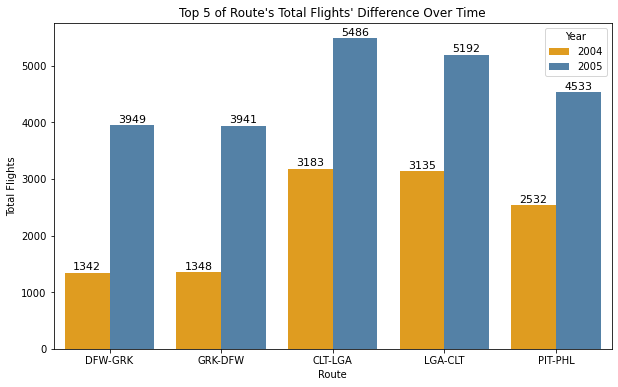

In [28]:
plt.figure(figsize=(10, 6))
plot = sns.barplot(data=top_route_melt, x="Route", y="Total_Flights", hue="Year", 
                   palette = ["orange", "steelblue"])
plt.title("Top 5 of Route's Total Flights' Difference Over Time")
plt.xlabel("Route")
plt.ylabel("Total Flights")
for i in plot.patches:
    plot.annotate(format(i.get_height(), '.0f'), 
                   (i.get_x() + i.get_width() / 2., i.get_height()), 
                   ha = 'center', va = 'center', size=11,
                   xytext = (0, 6), 
                   textcoords = 'offset points')

### Bottom 5 of Route's Total Flights' Difference

In [29]:
bottom_route_merge_sorted = route_merge.sort_values(["Difference"])
bottom_route_merge = bottom_route_merge_sorted.head(5)
bottom_route_merge

,Route,2004,2005,Difference
1188,DFW-MSY,4736,2287,-2449
2775,MSY-DFW,4609,2294,-2315
2779,MSY-HOU,6432,4156,-2276
1674,HOU-MSY,6411,4135,-2276
1212,DFW-SAT,7624,5361,-2263


### To make the visualization easier, we melt the data frame

In [30]:
bottom_route_merge_new = bottom_route_merge[["Route", 2004, 2005]]
bottom_route_melt = pd.melt(bottom_route_merge_new, id_vars = ["Route"])
bottom_route_melt.rename(columns = {"Route": "Route", "variable":"Year", "value":"Total_Flights"}, inplace = True)
bottom_route_melt

,Route,Year,Total_Flights
0,DFW-MSY,2004,4736
1,MSY-DFW,2004,4609
2,MSY-HOU,2004,6432
3,HOU-MSY,2004,6411
4,DFW-SAT,2004,7624
5,DFW-MSY,2005,2287
6,MSY-DFW,2005,2294
7,MSY-HOU,2005,4156
8,HOU-MSY,2005,4135
9,DFW-SAT,2005,5361


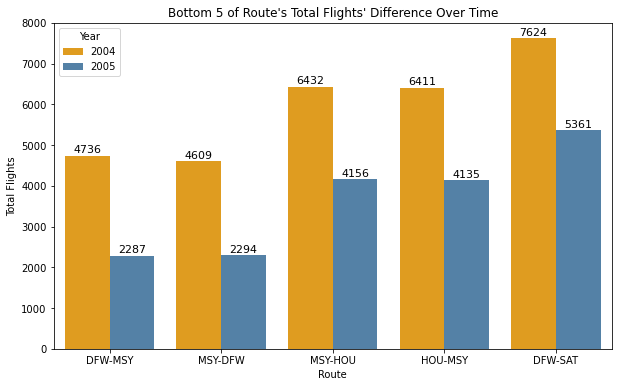

In [31]:
plt.figure(figsize=(10, 6))
plot = sns.barplot(data=bottom_route_melt, x="Route", y="Total_Flights", hue="Year", 
                   palette = ["orange", "steelblue"])
plt.title("Bottom 5 of Route's Total Flights' Difference Over Time")
plt.xlabel("Route")
plt.ylabel("Total Flights")
for i in plot.patches:
    plot.annotate(format(i.get_height(), '.0f'), 
                   (i.get_x() + i.get_width() / 2., i.get_height()), 
                   ha = 'center', va = 'center', size=11,
                   xytext = (0, 6), 
                   textcoords = 'offset points')

## Question 4 : Can you detect cascading failures as delays in one airport create delays in others?

In [32]:
cascadingfailures = pd.merge(flights,airports,left_on='Origin',right_on='iata')
cf = cascadingfailures[["Year", "Month", "DayofMonth", "DayOfWeek", "DepTime", "CRSDepTime", "ArrTime", 
                   "CRSArrTime", "TailNum", "ArrDelay", "DepDelay", "Origin", "Dest", "airport"]]
cf

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,TailNum,ArrDelay,DepDelay,Origin,Dest,airport
0,2004,1,12,1,623.0,630,901.0,915,N805UA,-14.0,-7.0,ORD,CLT,Chicago O'Hare International
1,2004,1,13,2,621.0,630,911.0,915,N851UA,-4.0,-9.0,ORD,CLT,Chicago O'Hare International
2,2004,1,14,3,633.0,630,920.0,915,N436UA,5.0,3.0,ORD,CLT,Chicago O'Hare International
3,2004,1,15,4,627.0,630,859.0,915,N828UA,-16.0,-3.0,ORD,CLT,Chicago O'Hare International
4,2004,1,16,5,635.0,630,918.0,915,N831UA,3.0,5.0,ORD,CLT,Chicago O'Hare International
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13980543,2005,12,30,5,1132.0,1128,1249.0,1235,N982SW,14.0,4.0,CWA,ORD,Central Wisconsin
13980544,2005,12,30,5,556.0,600,705.0,705,N973SW,0.0,-4.0,CWA,ORD,Central Wisconsin
13980545,2005,12,31,6,1721.0,1635,1822.0,1745,N983SW,37.0,46.0,CWA,ORD,Central Wisconsin
13980546,2005,12,31,6,1126.0,1128,1228.0,1235,N910SW,-7.0,-2.0,CWA,ORD,Central Wisconsin


### Find Specific Airplane In A Particular Day 

In [33]:
delay = cf[(cf["ArrDelay"] > 100) & (cf["Month"] == 12) & (cf["DayofMonth"] == 18) & (cf["TailNum"] == "N509US")]
delay

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,TailNum,ArrDelay,DepDelay,Origin,Dest,airport
4354070,2005,12,18,7,1213.0,1000,1459.0,1240,N509US,139.0,133.0,MCO,DTW,Orlando International
8664689,2005,12,18,7,1607.0,1347,1739.0,1530,N509US,129.0,140.0,DTW,LGA,Detroit Metropolitan-Wayne County
9482714,2005,12,18,7,1832.0,1625,2045.0,1828,N509US,137.0,127.0,LGA,DTW,LaGuardia


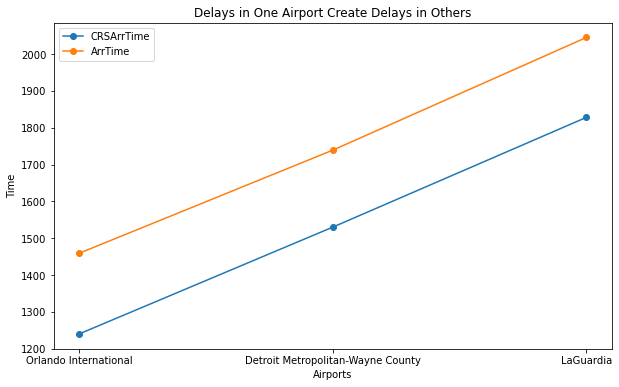

In [34]:
fig, ax = plt.subplots(figsize = (10,6))
plt.plot(delay["airport"], delay["CRSArrTime"], label = "CRSArrTime", marker = "o")
plt.plot(delay["airport"], delay["ArrTime"], label = "ArrTime", marker = "o")
plt.title("Delays in One Airport Create Delays in Others")
plt.xlabel("Airports")
plt.ylabel("Time")
plt.legend()
plt.show()

## Question 5 : Use the available variables to construct a model that predicts delays.

In [35]:
skim(flights)

╭───────────────────────────────────── skimpy summary ──────────────────────────────────────╮
│           Data Summary                 Data Types                                         │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                  │
│ ┃ dataframe         ┃ Values   ┃ ┃ Column Type ┃ Count ┃                                  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                  │
│ │ Number of rows    │ 13980548 │ │ int64       │ 18    │                                  │
│ │ Number of columns │ 31       │ │ object      │ 7     │                                  │
│ └───────────────────┴──────────┘ │ float64     │ 6     │                                  │
│                                  └─────────────┴───────┘                                  │
│                                          number                                           │
│ ┏━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃           ┃ missing ┃ complete  ┃ mean  ┃ sd   ┃ p0    ┃ p25  ┃ p75  ┃ p100 ┃ hist   ┃  │
│ ┃           ┃         ┃ rate      ┃       ┃      ┃       ┃      ┃      ┃      ┃        ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Year      │       0 │         1 │  2000 │  0.5 │  2000 │ 2000 │ 2000 │ 2000 │ █    █ │  │
│ │ Month     │       0 │         1 │   6.5 │  3.4 │     1 │    4 │    9 │   12 │ ▇████▇ │  │
│ │ DayofMont │       0 │         1 │    16 │  8.8 │     1 │    8 │   23 │   31 │ ▇▇▇▇▇█ │  │
│ │ h         │         │           │       │      │       │      │      │      │        │  │
│ │ DayOfWeek │       0 │         1 │   3.9 │    2 │     1 │    2 │    6 │    7 │ ▄▄▄▄▄█ │  │
│ │ DepTime   │       0 │         1 │  1300 │  480 │     1 │  940 │ 1700 │ 2800 │  ▆▇█▄  │  │
│ │ CRSDepTim │       0 │         1 │  1300 │  460 │     0 │  930 │ 1700 │ 2400 │  ▄██▇▃ │  │
│ │ e         │         │           │       │      │       │      │      │      │        │  │
│ │ ArrTime   │       0 │         1 │  1500 │  500 │     1 │ 1100 │ 1900 │ 3000 │  ▄██▅  │  │
│ │ CRSArrTim │       0 │         1 │  1500 │  480 │     0 │ 1100 │ 1900 │ 2400 │  ▁▇▇█▆ │  │
│ │ e         │         │           │       │      │       │      │      │      │        │  │
│ │ FlightNum │       0 │         1 │  2100 │ 1900 │     1 │  580 │ 3100 │ 9900 │  █▃▂▁  │  │
│ │ ActualEla │       0 │         1 │   120 │   71 │  -710 │   73 │  160 │ 1800 │   █▃   │  │
│ │ psedTime  │         │           │       │      │       │      │      │      │        │  │
│ │ CRSElapse │       0 │         1 │   130 │   70 │   -31 │   75 │  160 │ 1400 │   █▁   │  │
│ │ dTime     │         │           │       │      │       │      │      │      │        │  │
│ │ AirTime   │       0 │         1 │   100 │   84 │ -3800 │   53 │  130 │ 2000 │     █  │  │
│ │ ArrDelay  │       0 │         1 │   6.8 │   34 │ -1300 │   -9 │   10 │ 1900 │    █   │  │
│ │ DepDelay  │       0 │         1 │   8.3 │   30 │ -1200 │   -4 │    6 │ 1900 │    █   │  │
│ │ Distance  │       0 │         1 │   720 │  570 │     8 │  310 │  950 │ 5000 │  █▃▁   │  │
│ │ TaxiIn    │       0 │         1 │   7.8 │   45 │     0 │    4 │    8 │ 1500 │   █    │  │
│ │ TaxiOut   │       0 │         1 │    16 │   13 │     0 │   10 │   18 │ 3900 │   █    │  │
│ │ Cancelled │       0 │         1 │     0 │    0 │     0 │    0 │    0 │    0 │     █  │  │
│ │ Diverted  │       0 │         1 │     0 │    0 │     0 │    0 │    0 │    0 │     █  │  │
│ │ CarrierDe │       0 │         1 │   2.9 │   17 │     0 │    0 │    0 │ 1900 │   █    │  │
│ │ lay       │         │           │       │      │       │      │      │      │        │  │
│ │ WeatherDe │       0 │         1 │   0.7 │  8.6 │     0 │    0 │    0 │ 1500 │   █    │  │
│ │ lay       │         │           │       │      │       │      │      │      │        │  │
│ │ NASDelay  │       0 │         1 │   3.5 │   15 │

In [36]:
flights.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,interval_deptime,Route
0,2004,1,12,1,623.0,630,901.0,915,UA,462,...,0,NaN,0,0,0,0,0,0,06.00-07.59,ORD-CLT
1,2004,1,13,2,621.0,630,911.0,915,UA,462,...,0,NaN,0,0,0,0,0,0,06.00-07.59,ORD-CLT
2,2004,1,14,3,633.0,630,920.0,915,UA,462,...,0,NaN,0,0,0,0,0,0,06.00-07.59,ORD-CLT
3,2004,1,15,4,627.0,630,859.0,915,UA,462,...,0,NaN,0,0,0,0,0,0,06.00-07.59,ORD-CLT
4,2004,1,16,5,635.0,630,918.0,915,UA,462,...,0,NaN,0,0,0,0,0,0,06.00-07.59,ORD-CLT


### Take 100,000 samples from flights table to construct models that predict delays

In [157]:
sample_flights = flights.sample(n=100000, random_state = 1)
sample_flights.shape

(100000, 31)

In [158]:
numerical_features = ["Year", "Month", "DayofMonth", "CRSDepTime", "CRSArrTime", "DepDelay", "FlightNum", "Distance"]
train_X = sample_flights[numerical_features].copy()
train_Y = sample_flights[["ArrDelay"]].copy()

### Create Train and Test Set

In [159]:
train_x, test_x, train_y, test_y = train_test_split(train_X, train_Y, test_size=0.3, random_state=100)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((70000, 8), (30000, 8), (70000, 1), (30000, 1))

### Using Linear Regression

#### Create an object of the LinearRegression Model

In [160]:
linear = LinearRegression()

#### Fit the model with the training data

In [161]:
linear.fit(train_x, train_y)

LinearRegression()

#### Predict the target on train and test data  

In [162]:
predict_train_linear = linear.predict(train_x)
predict_test_linear  = linear.predict(test_x)

#### Mean Squared Error on train and test date and R Squared

In [163]:
mse_train_ln = mean_squared_error(train_y, predict_train_linear, squared = True)
mse_test_ln = mean_squared_error(test_y, predict_test_linear, squared = True)      
r_squared_ln = linear.score(train_X, train_Y)

In [164]:
print("MSE on train data: ", mse_train_ln)
print("MSE on test data: ", mse_test_ln)
print("R Squared: ", r_squared_ln)

MSE on train data:  181.04818454356106
MSE on test data:  182.64542141521537
R Squared:  0.8447149361464458


### Using Ridge Regression

#### Create an object of the Ridge Model

In [165]:
ridge = linear_model.Ridge()

#### Fit the model with the training data

In [166]:
ridge.fit(train_x, train_y)

Ridge()

#### Predict the target on train and test data  

In [167]:
predict_train_ridge = ridge.predict(train_x)
predict_test_ridge  = ridge.predict(test_x)

#### Mean Squared Error on train and test date and R Squared

In [168]:
mse_train_ridge = mean_squared_error(train_y, predict_train_ridge, squared = True)
mse_test_ridge = mean_squared_error(test_y, predict_test_ridge, squared = True)
r_squared_ridge = ridge.score(train_X, train_Y)

In [169]:
print("MSE on train data: ", mse_train_ridge)
print("MSE on test data: ",  mse_test_ridge)
print("R Squared: ", r_squared_ridge)

MSE on train data:  181.04818454357965
MSE on test data:  182.64542122912593
R Squared:  0.844714936194191


### Using Lasso Regression

#### Create an object of the Lasso Model

In [170]:
lasso = linear_model.Lasso()

#### Fit the lasso model with the training data

In [171]:
lasso.fit(train_x, train_y)

Lasso()

#### Predict the target on train and test data 

In [172]:
predict_train_lasso = lasso.predict(train_x)
predict_test_lasso  = lasso.predict(test_x)

#### Mean Squared Error on train and test data and R Squared

In [173]:
mse_train_lasso = mean_squared_error(train_y, predict_train_lasso, squared = True)
mse_test_lasso = mean_squared_error(test_y, predict_test_lasso, squared = True)      
r_squared_lasso = lasso.score(train_X, train_Y)

In [174]:
print("MSE on train data: ", mse_train_lasso)
print("MSE on test data: ",  mse_test_lasso)
print("R Squared: ", r_squared_lasso)

MSE on train data:  181.10012513495695
MSE on test data:  182.72006405009716
R Squared:  0.8446646782417747


### Using Random Forest

#### Create an object of the RandomForestRegressor

In [175]:
random_forest = RandomForestRegressor()

#### Fit the random forest model with the training data

In [176]:
random_forest.fit(train_x, train_y.values.ravel())

RandomForestRegressor()

#### Predict the target on train and test data

In [177]:
predict_train_rf = random_forest.predict(train_x)
predict_test_rf = random_forest.predict(test_x)

####  Mean Squared Error on train and test data and R Squared

In [178]:
mse_train_rf = mean_squared_error(train_y, predict_train_rf, squared = True)
mse_test_rf = mean_squared_error(test_y, predict_test_rf, squared = True)         
r_squared_rf = random_forest.score(train_X, train_Y)

In [179]:
print("MSE on train data: ", mse_train_rf)
print("MSE on test data: ", mse_test_rf )
print("R Squared: ", r_squared_rf)

MSE on train data:  26.661621838571428
MSE on test data:  198.23243744333337
R Squared:  0.9331623207632878


### Comparing RMSE between Linear Regression, Ridge Regression, Lasso Regression, and Random Forest

In [180]:
method = pd.DataFrame({"Method":["Linear Regression", "Ridge Regression", "Lasso Regression", "Random Forest"],
                       "MSE Train Data":[mse_train_ln, mse_train_ridge, mse_train_lasso, mse_train_rf],
                       "MSE Test Data":[mse_test_ln, mse_test_ridge, mse_test_lasso, mse_test_rf],
                       "R Squared":[r_squared_ln, r_squared_ridge, r_squared_lasso, r_squared_rf]})
method

,Method,MSE Train Data,MSE Test Data,R Squared
0,Linear Regression,181.048185,182.645421,0.844715
1,Ridge Regression,181.048185,182.645421,0.844715
2,Lasso Regression,181.100125,182.720064,0.844665
3,Random Forest,26.661622,198.232437,0.933162
